### **Relatório de Análise de Vendas - Rede de Lojas**

Este relatório apresenta os insights gerados a partir dos dados de vendas das lojas em Fortaleza.
As análises incluem:

*   Categorias mais vendidas
*   Impacto de promoções
*   Desempenho de
vendedores


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Configuração global de estilo
sns.set_theme(style="whitegrid")

# Carregar os arquivos CSV
lojas = pd.read_csv(r"/content/lojas.csv")
produtos = pd.read_csv(r"/content/produtos.csv")
estoque = pd.read_csv(r"/content/estoques.csv")
vendas = pd.read_csv(r"/content/vendas.csv")

# Verificar as primeiras linhas de cada tabela
print("Lojas:")
print(lojas.head(), "\n")

print("Produtos:")
print(produtos.head(), "\n")

print("Estoque:")
print(estoque.head(), "\n")

print("Vendas:")
print(vendas.head(), "\n")

Lojas:
   ID_Loja Nome_Loja           Localização
0        1   Aldeota   Fortaleza - Aldeota
1        2  Meireles  Fortaleza - Meireles
2        3    Centro    Fortaleza - Centro 

Produtos:
   ID_Produto               Nome_Produto   Categoria   Preço
0           1            Lenco Estampado  Acessórios  119.97
1           2               Bolsa Floral  Acessórios  290.44
2           3  Calca Pantalona Estampada      Calças  125.45
3           4         Camiseta Estampada      Blusas  217.84
4           5              Brinco Flores  Acessórios  271.05 

Estoque:
   ID_Estoque  ID_Loja  ID_Produto  Estoque_Inicial  Reposicao  Estoque_Final
0           1        1           1               24          7             26
1           2        1           2               18          9              5
2           3        1           3                5          9              0
3           4        1           4               15          4              0
4           5        1           5        

In [3]:
# Unir vendas e produtos para análise detalhada
vendas_produtos = vendas.merge(produtos, on="ID_Produto").merge(lojas, on="ID_Loja")

# Visualizar as primeiras linhas da tabela combinada
print(vendas_produtos.head())


# Adicionar coluna de receita
vendas_produtos["Receita"] = vendas_produtos["Quantidade"] * vendas_produtos["Preco_Unitario"]

   ID_Venda  Data_Venda  ID_Loja  ID_Produto Vendedor  Quantidade  \
0         1  2024-10-29        1           8  Kamilly           5   
1         2  2024-08-31        1           4   Emilly           3   
2         3  2024-11-26        1           5  Kamilly           5   
3         4  2024-06-06        1          17   Emilly           4   
4         5  2024-08-14        1           2     Caio           3   

   Preco_Unitario Promocao             Nome_Produto   Categoria   Preço  \
0          133.68      Sim  Vestido Longo Estampado    Vestidos  167.10   
1          174.27      Sim       Camiseta Estampada      Blusas  217.84   
2          271.05      Não            Brinco Flores  Acessórios  271.05   
3          217.63      Não               Calca Reta      Calças  217.63   
4          290.44      Não             Bolsa Floral  Acessórios  290.44   

  Nome_Loja          Localização  
0   Aldeota  Fortaleza - Aldeota  
1   Aldeota  Fortaleza - Aldeota  
2   Aldeota  Fortaleza - Alde

### Quais categorias de produtos são mais vendidas em cada loja?

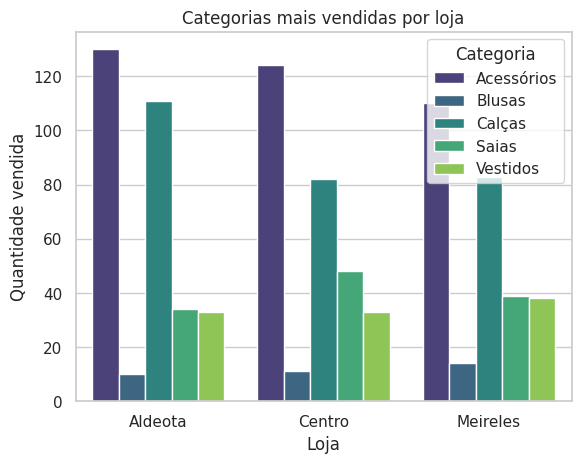

In [12]:


# Relacionar tabelas de vendas, produtos e lojas
vendas_produtos_lojas = vendas.merge(produtos, on="ID_Produto").merge(lojas, on="ID_Loja")

# Agrupar por loja e categoria
categorias_vendas = vendas_produtos_lojas.groupby(["Nome_Loja", "Categoria"])["Quantidade"].sum().reset_index()

# Visualizar categorias mais vendidas por loja
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=categorias_vendas, x="Nome_Loja", y="Quantidade", hue="Categoria", palette="viridis")
plt.title("Categorias mais vendidas por loja")
plt.ylabel("Quantidade vendida")
plt.xlabel("Loja")
plt.legend(title="Categoria")
plt.show()

### Quais os produtos mais vendidos?

In [17]:
import plotly.express as px

# Gráfico interativo de produtos mais vendidos
produtos_vendidos = vendas_produtos.groupby("Nome_Produto")["Quantidade"].sum().reset_index()

fig = px.bar(produtos_vendidos, x="Nome_Produto", y="Quantidade",
             title="Produtos Mais Vendidos", labels={"Quantidade": "Unidades Vendidas"})
fig.show()

### Quais lojas têm maior impacto positivo das promoções em suas vendas?

<ipython-input-5-b843d3aac5cb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impacto_promocoes, x="Nome_Loja", y="Impacto (%)", palette="viridis")


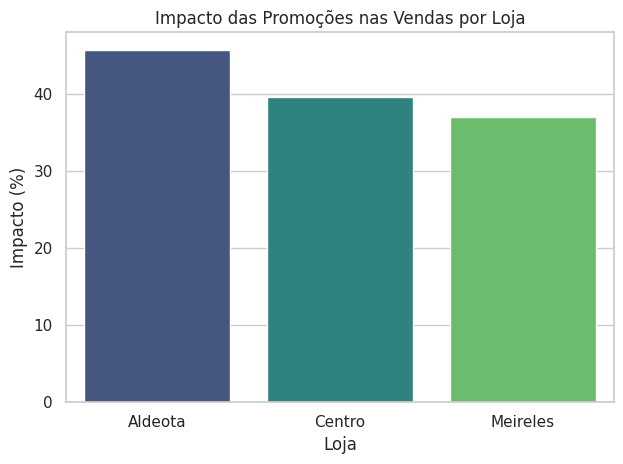

In [5]:
# Agrupando receita por loja e tipo de promoção
impacto_promocoes = vendas_produtos.groupby(["Nome_Loja", "Promocao"])["Receita"].sum().reset_index()

# Separando a receita de produtos promocionais e não promocionais
impacto_promocoes = impacto_promocoes.pivot(index="Nome_Loja", columns="Promocao", values="Receita").reset_index()
impacto_promocoes["Impacto (%)"] = (impacto_promocoes["Sim"] / (impacto_promocoes["Sim"] + impacto_promocoes["Não"])) * 100

# Gráfico de Impacto de Promoções
sns.barplot(data=impacto_promocoes, x="Nome_Loja", y="Impacto (%)", palette="viridis")
plt.title("Impacto das Promoções nas Vendas por Loja")
plt.ylabel("Impacto (%)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


### Quais produtos mais se beneficiaram de promoções?

<ipython-input-18-805310ca7b74>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




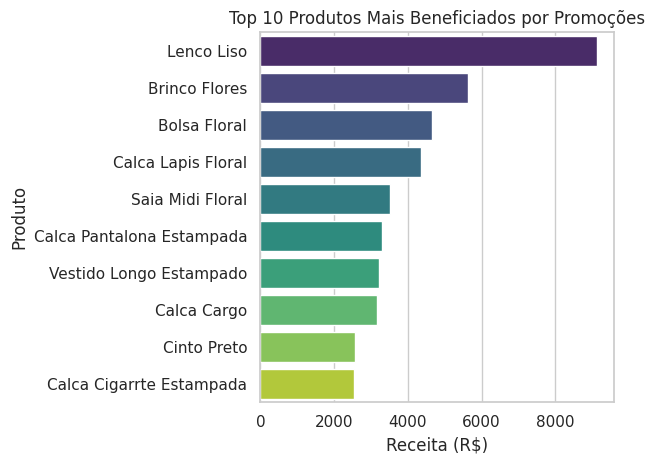

In [18]:
# Filtrando produtos vendidos em promoção
produtos_promocao = vendas_produtos[vendas_produtos["Promocao"] == "Sim"]

# Calculando receita por produto
receita_promocao = produtos_promocao.groupby("Nome_Produto")["Receita"].sum().reset_index()
receita_promocao = receita_promocao.sort_values(by="Receita", ascending=False)

# Filtrar os top 10 produtos mais beneficiados por promoções
top_produtos_promocao = receita_promocao.head(10)

# Gráfico de Barras Horizontal
sns.barplot(data=top_produtos_promocao, y="Nome_Produto", x="Receita", palette="viridis")
plt.title("Top 10 Produtos Mais Beneficiados por Promoções")
plt.xlabel("Receita (R$)")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


### Quem são os melhores vendedores (por loja e no geral)?

<ipython-input-19-56d8ae1e28ab>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



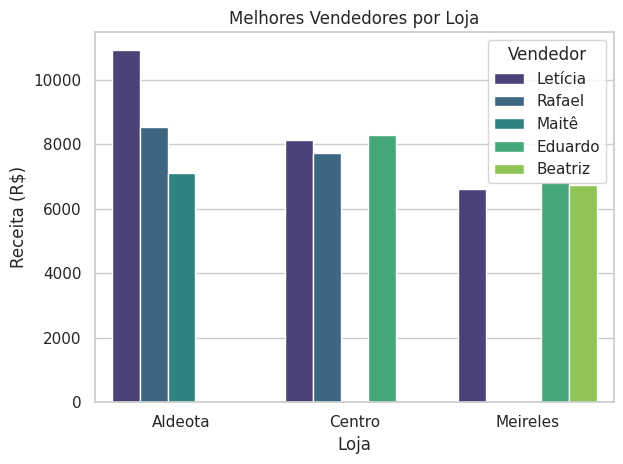

In [19]:
# Receita por vendedor e loja
desempenho_vendedores = vendas_produtos.groupby(["Nome_Loja", "Vendedor"])["Receita"].sum().reset_index()
desempenho_vendedores = desempenho_vendedores.sort_values(["Nome_Loja", "Receita"], ascending=[True, False])

# Preparar dados
melhores_vendedores = desempenho_vendedores.groupby("Nome_Loja").apply(lambda x: x.nlargest(3, "Receita")).reset_index(drop=True)

# Gráfico de Barras Agrupadas
sns.barplot(data=melhores_vendedores, x="Nome_Loja", y="Receita", hue="Vendedor", palette="viridis")
plt.title("Melhores Vendedores por Loja")
plt.ylabel("Receita (R$)")
plt.xlabel("Loja")
plt.legend(title="Vendedor")
plt.tight_layout()
plt.show()


### Existe relação entre desempenho de vendedores e vendas de produtos em promoção?

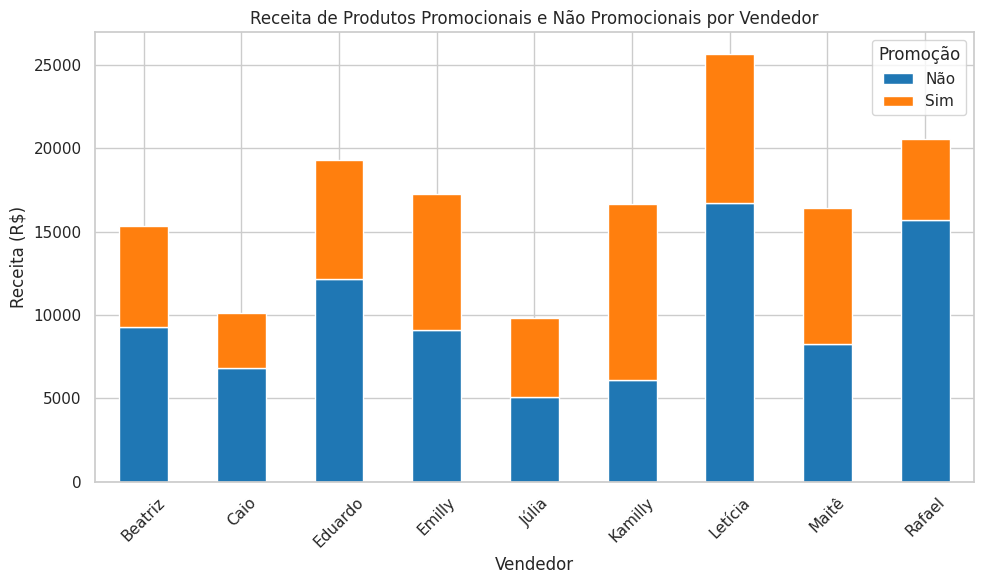

In [21]:
# Receita por vendedor para produtos promocionais e não promocionais
relacao_promocoes = vendas_produtos.groupby(["Vendedor", "Promocao"])["Receita"].sum().reset_index()

# Separando em dois grupos para comparação
receita_vendedor_promocao = relacao_promocoes.pivot(index="Vendedor", columns="Promocao", values="Receita").reset_index()

# Preparar dados para o gráfico
receita_vendedor_promocao.fillna(0, inplace=True)
receita_vendedor_promocao.set_index("Vendedor", inplace=True)
receita_vendedor_promocao.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Receita de Produtos Promocionais e Não Promocionais por Vendedor")
plt.ylabel("Receita (R$)")
plt.xlabel("Vendedor")
plt.legend(title="Promoção", labels=["Não", "Sim"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Algum vendedor se destaca em categorias específicas de produtos?

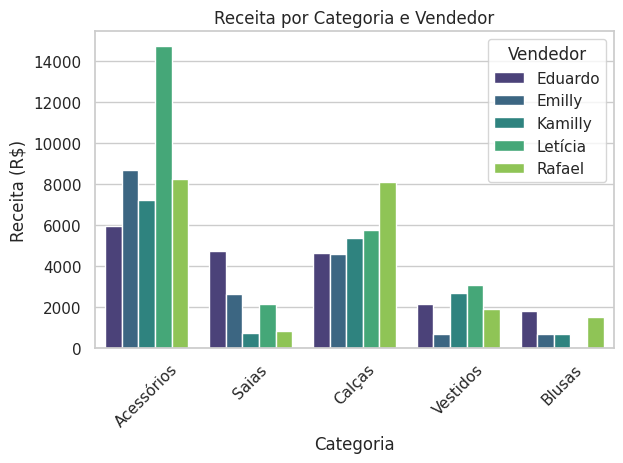

In [9]:
# Receita por vendedor e categoria de produto
vendedor_categoria = vendas_produtos.groupby(["Vendedor", "Categoria"])["Receita"].sum().reset_index()
vendedor_categoria = vendedor_categoria.sort_values(["Vendedor", "Receita"], ascending=[True, False])

# Filtrar os top 5 vendedores em termos de receita total
top_vendedores = vendedor_categoria.groupby("Vendedor")["Receita"].sum().nlargest(5).index
vendedor_categoria_top = vendedor_categoria[vendedor_categoria["Vendedor"].isin(top_vendedores)]

# Gráfico de Barras Agrupadas
sns.barplot(data=vendedor_categoria_top, x="Categoria", y="Receita", hue="Vendedor", palette="viridis")
plt.title("Receita por Categoria e Vendedor")
plt.ylabel("Receita (R$)")
plt.xlabel("Categoria")
plt.legend(title="Vendedor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Conclusão**

Os dados mostram que promoções aumentaram significativamente as vendas em todas as lojas, e
alguns vendedores se destacaram em categorias específicas. A loja do Meireles obteve o maior
impacto de promoções.